In [39]:
import doxapy
from utils import *

In [40]:
img_dir = "./imgs/pt"
save_dir = "./texts/ocr_from_col"

extract_text(img_dir, save_dir)
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", save_dir, print_results=True)

Word Error Rate: 0.94
Character Error Rate: 0.16


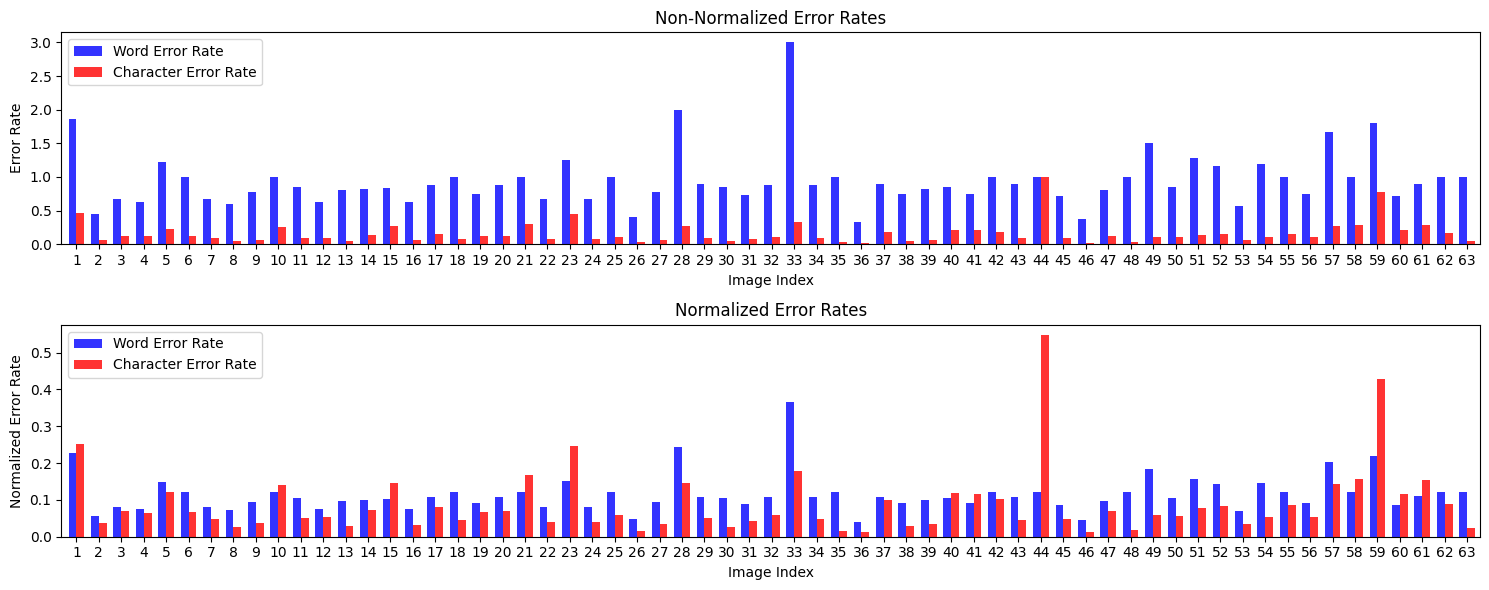

In [41]:
plot_error_rates(word_error_rate, char_error_rate)

In [42]:
res_table = put_res_to_table("Colored cropped images", mean_wer, mean_cer)

+------------------------+-------+-------+
| Source & Params        |   WER |   CER |
+========================+=======+=======+
| Colored cropped images |  0.94 |  0.16 |
+------------------------+-------+-------+


Try to binarize the images on your own (e.g. Otsu, Su) and compare it to the OCR results of the color images.

In [43]:
su = doxapy.Binarization(doxapy.Binarization.Algorithms.SU)

bin_imgs_dir = "./imgs/pt_bin"

if not os.path.exists(bin_imgs_dir):
    os.makedirs(bin_imgs_dir)
else:
    shutil.rmtree(bin_imgs_dir)
    os.makedirs(bin_imgs_dir)

for i in os.listdir(img_dir):
    img_idx = i.split(".")[0].split("_")[1]
    img = cv2.imread(img_dir + "/" + i, cv2.IMREAD_GRAYSCALE)
    su.initialize(img)
    su.to_binary(img, {"window": 10})
    cv2.imwrite(bin_imgs_dir + "/bin_" + img_idx + ".jpg", img)  

In [44]:
extract_text(bin_imgs_dir, "./texts/ocr_from_bin")
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/ocr_from_bin", print_results=True)

Word Error Rate: 0.84
Character Error Rate: 0.11


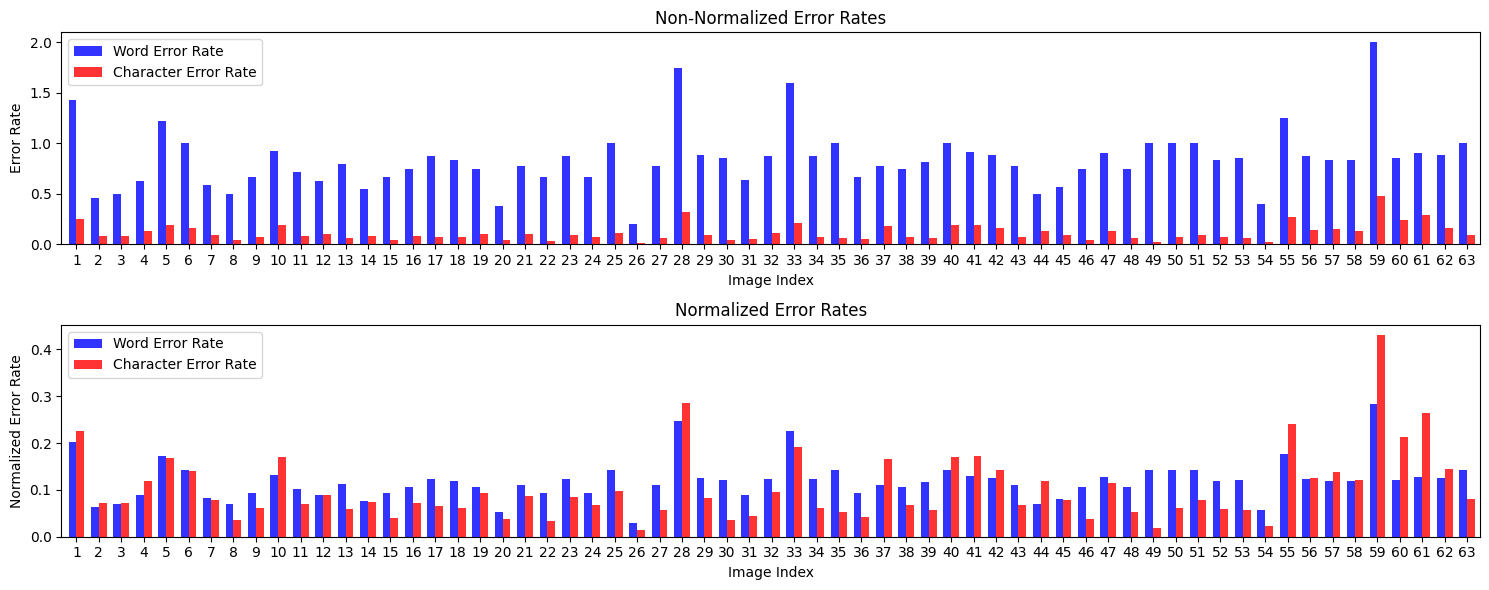

In [45]:
plot_error_rates(word_error_rate, char_error_rate)

In [46]:
res_table = put_res_to_table("Binarized cropped images (Su, window size=15)", mean_wer, mean_cer, True, res_table)

+-----------------------------------------------+-------+-------+
| Source & Params                               |   WER |   CER |
+===============================================+=======+=======+
| Colored cropped images                        |  0.94 |  0.16 |
+-----------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15) |  0.84 |  0.11 |
+-----------------------------------------------+-------+-------+


Directly forward the full images to Tesseract and compare it to the results when only using the crops of our Yolo model.

In [47]:
full_img_dir = "./imgs/dataset"
full_img_copy_dir = "./imgs/full_img_copy"

if not os.path.exists(full_img_copy_dir):
    os.makedirs(full_img_copy_dir)
else:
    shutil.rmtree(full_img_copy_dir)
    os.makedirs(full_img_copy_dir)   

for i in os.listdir(full_img_dir):
    img_idx = str(int(i.split("_")[0]))
    shutil.copyfile(full_img_dir + "/" + i, full_img_copy_dir + "/img_" + img_idx + ".jpg")

In [48]:
extract_text(full_img_copy_dir, "./texts/ocr_from_full")
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/ocr_from_full", print_results=False)
res_table = put_res_to_table("Directly forwarded full images (psm=3)", mean_wer, mean_cer, True, res_table)

+-----------------------------------------------+-------+-------+
| Source & Params                               |   WER |   CER |
+===============================================+=======+=======+
| Colored cropped images                        |  0.94 |  0.16 |
+-----------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15) |  0.84 |  0.11 |
+-----------------------------------------------+-------+-------+
| Directly forwarded full images (psm=3)        |  1.54 |  0.4  |
+-----------------------------------------------+-------+-------+


Evaluate the influence of the Page Segmentation Mode (PSM) of Tesseract.

In [49]:
extract_text(full_img_copy_dir, "./texts/bin_psm_1", config="--psm 1")

In [50]:
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/bin_psm_1", print_results=False)
res_table = put_res_to_table("Directly forwarded full images (psm=1)", mean_wer, mean_cer, True, res_table)

+-----------------------------------------------+-------+-------+
| Source & Params                               |   WER |   CER |
+===============================================+=======+=======+
| Colored cropped images                        |  0.94 |  0.16 |
+-----------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15) |  0.84 |  0.11 |
+-----------------------------------------------+-------+-------+
| Directly forwarded full images (psm=3)        |  1.54 |  0.4  |
+-----------------------------------------------+-------+-------+
| Directly forwarded full images (psm=1)        |  1.53 |  0.41 |
+-----------------------------------------------+-------+-------+


In [51]:
extract_text(full_img_copy_dir, "./texts/bin_psm_11", config="--psm 11")
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/bin_psm_11", print_results=False)
res_table = put_res_to_table("Directly forwarded full images (psm=11)", mean_wer, mean_cer, True, res_table)

+-----------------------------------------------+-------+-------+
| Source & Params                               |   WER |   CER |
+===============================================+=======+=======+
| Colored cropped images                        |  0.94 |  0.16 |
+-----------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15) |  0.84 |  0.11 |
+-----------------------------------------------+-------+-------+
| Directly forwarded full images (psm=3)        |  1.54 |  0.4  |
+-----------------------------------------------+-------+-------+
| Directly forwarded full images (psm=1)        |  1.53 |  0.41 |
+-----------------------------------------------+-------+-------+
| Directly forwarded full images (psm=11)       | 14.37 |  4.44 |
+-----------------------------------------------+-------+-------+


In [52]:
extract_text(bin_imgs_dir, "./texts/bin_psm6", config="--psm 6")
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/bin_psm6", print_results=False)
res_table = put_res_to_table("Binarized cropped images (Su, window size=15, psm=6)", mean_wer, mean_cer, True, res_table)

+------------------------------------------------------+-------+-------+
| Source & Params                                      |   WER |   CER |
+======================================================+=======+=======+
| Colored cropped images                               |  0.94 |  0.16 |
+------------------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15)        |  0.84 |  0.11 |
+------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=3)               |  1.54 |  0.4  |
+------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=1)               |  1.53 |  0.41 |
+------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=11)              | 14.37 |  4.44 |
+------------------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15, psm

In [53]:
extract_text(img_dir, "./texts/col_psm_6", config="--psm 6")
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/col_psm_6", print_results=False)
res_table = put_res_to_table("Colored cropped images (psm=6)", mean_wer, mean_cer, True, res_table)

+------------------------------------------------------+-------+-------+
| Source & Params                                      |   WER |   CER |
+======================================================+=======+=======+
| Colored cropped images                               |  0.94 |  0.16 |
+------------------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15)        |  0.84 |  0.11 |
+------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=3)               |  1.54 |  0.4  |
+------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=1)               |  1.53 |  0.41 |
+------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=11)              | 14.37 |  4.44 |
+------------------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15, psm

In [54]:
extract_text(bin_imgs_dir, "./texts/bin_psm_11", config="--psm 11")
mean_wer, mean_cer, word_error_rate, char_error_rate = evaluate("./texts/gt", "./texts/bin_psm_11", print_results=False)
res_table = put_res_to_table("Binarized cropped images (Su, window size=15, psm=11)", mean_wer, mean_cer, True, res_table)

+-------------------------------------------------------+-------+-------+
| Source & Params                                       |   WER |   CER |
+=======================================================+=======+=======+
| Colored cropped images                                |  0.94 |  0.16 |
+-------------------------------------------------------+-------+-------+
| Binarized cropped images (Su, window size=15)         |  0.84 |  0.11 |
+-------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=3)                |  1.54 |  0.4  |
+-------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=1)                |  1.53 |  0.41 |
+-------------------------------------------------------+-------+-------+
| Directly forwarded full images (psm=11)               | 14.37 |  4.44 |
+-------------------------------------------------------+-------+-------+
| Binarized cropped images (Su, window